#Assignment Code: DA-AG-018

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
* Anomaly Detection is the process of identifying data points, patterns, or events that deviate significantly from normal behavior. These anomalies often signal fraud, errors, failures, or unusual events. It is widely used in banking (fraud detection), cybersecurity (intrusion detection), healthcare (disease detection), and manufacturing (fault detection).
* Types of Anomalies
   1. Point Anomalies
      * A single data instance is very different from the rest.
      * Example: A credit card user who normally spends ₹2,000–₹5,000 suddenly spends ₹1,00,000.
   2. Contextual Anomalies
      * A data point is anomalous only under specific conditions (time, location, context).
      * Example: A temperature of 35°C is normal in summer but abnormal in winter.
   3. Collective Anomalies
      * A group of data points together shows abnormal behavior, though individual points may seem normal.
      * Example: Multiple login attempts from different countries within a few minutes, indicating a possible cyberattack.


Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
* Isolation Forest (iForest)
   * Idea: Anomalies are easier to isolate using random trees.
   * Good for: High-dimensional & large datasets.
   * Example: Fraud detection in credit card transactions.
* DBSCAN
   * Idea: Clusters dense regions; points outside clusters = anomalies.
   * Good for: Spatial or location-based data.
   * Example: Detecting noise in GPS data.
* Local Outlier Factor (LOF)
   * Idea: Checks local density; points much less dense than neighbors = anomalies.
   * Good for: Detecting local anomalies when data density varies.
   * Example: Intrusion detection in networks.

* In short, Isolation Forest isolates anomalies using random trees and is best for large, high-dimensional data; DBSCAN detects anomalies as points lying outside dense clusters, making it suitable for spatial data; while LOF identifies anomalies by comparing local densities, useful when data density varies.

Question 3: What are the key components of a Time Series? Explain each with one
example.
* A time series is a sequence of data points collected over time (e.g., daily stock prices, monthly sales, yearly rainfall).
* Its main components are:
   1. Trend
      * Definition: The long-term upward or downward movement in the data.
      * Example: Company revenue showing steady growth over 10 years.
   2. Seasonality
      * Definition: Regular, repeating patterns within a fixed time period.
      * Example: Ice-cream sales increase every summer and drop in winter.
   3. Cyclic Component
      * Definition: Long-term oscillations that occur over years, often linked to business/economic cycles. Unlike seasonality, cycles do not have a fixed period.
      * Example: Stock market boom and recession cycles.
   4. Irregular (Residual/Noise)
      * Definition: Random, unpredictable variations that cannot be explained by trend, seasonality, or cycles.
      * Example: Sudden sales drop due to a natural disaster.


Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
* A time series is stationary if its statistical properties (mean, variance, autocorrelation) remain constant over time.
     * In simple words: the series does not depend on time.
     * Stationarity is important because most forecasting models (like ARIMA) assume the data is stationary.
* How to Test for Stationarity
   1. Visual Inspection:
       * Plot the data → if there’s a clear trend or seasonality, it’s likely non-stationary.
   2. Summary Statistics:
       * Divide the series into parts and compare mean/variance. If they change → non-stationary.
   3. Statistical Tests:
       * ADF (Augmented Dickey-Fuller Test): Null hypothesis = series is non-stationary.
       * KPSS Test: Null hypothesis = series is stationary.

* How to Make a Series Stationary:
   * Differencing: Subtract current value from the previous value. Example: New series = (Sales at time t) – (Sales at time t–1).
   * Detrending: Remove the trend (e.g., by regression).
   * Deseasonalizing: Remove seasonality using seasonal decomposition.
   * Transformations: Apply log, square root, or Box-Cox transformation to stabilize variance.



Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
1. AR (Autoregressive Model)
   * Structure: Current value depends on its own past values.
   * Notation: AR(p) → p = number of past lags.
   * Example Use: Stock prices depending on previous day(s).

2. MA (Moving Average Model)
   * Structure: Current value depends on past forecast errors (shocks).
   * Notation: MA(q) → q = number of past error terms.
   * Example Use: Noise reduction in financial data.

3. ARIMA (Autoregressive Integrated Moving Average)
   * Structure: Combination of AR + MA with differencing to handle non-stationary data.
   * Notation: ARIMA(p, d, q) →
      * p = AR terms,
      * d = differencing order,
      * q = MA terms.
   * Example Use: Forecasting sales or demand trends.

4. SARIMA (Seasonal ARIMA)
   * Structure: Extends ARIMA by adding seasonal terms.
   * Notation: ARIMA(p, d, q) × (P, D, Q, s) →
      * P, D, Q = seasonal components,
      * s = length of season (e.g., 12 for monthly data).
   * Example Use: Monthly electricity demand, ice-cream sales with yearly seasonality.


5. SARIMAX (Seasonal ARIMA with eXogenous variables)
   * Structure: SARIMA + includes external predictors (exogenous variables).
   * Example Use: Forecasting sales using seasonal trends plus marketing spend, holidays, or weather data.


**Dataset**:
  

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
(Include your Python code and output in the code box below.)


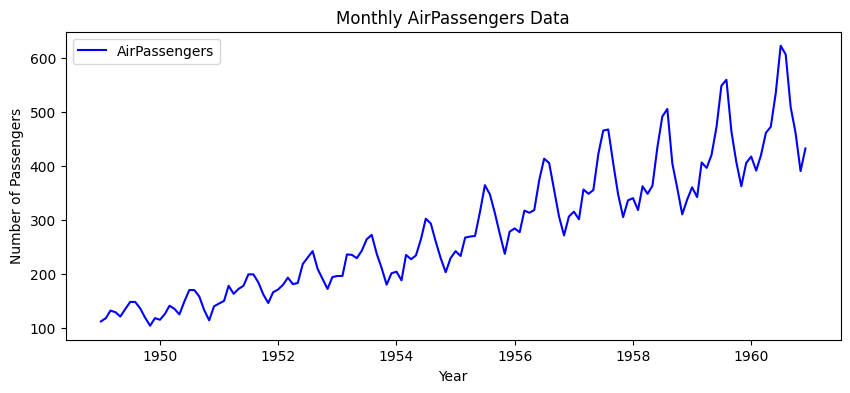

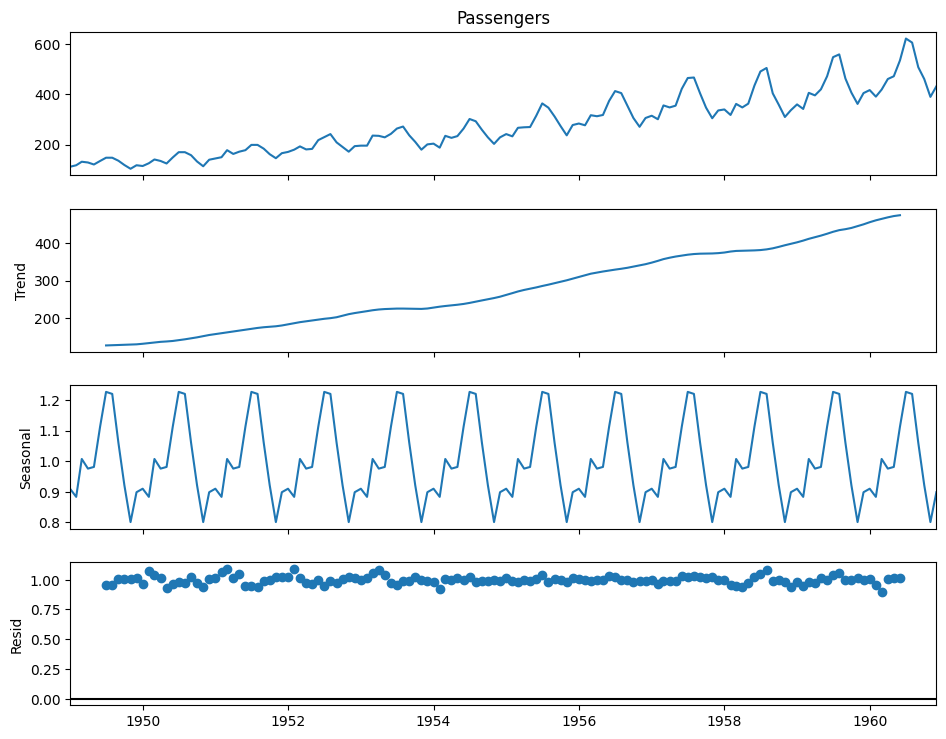

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(data['Passengers'], label="AirPassengers", color="blue")
plt.title("Monthly AirPassengers Data")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decompose the series into Trend, Seasonality, and Residuals
result = seasonal_decompose(data['Passengers'], model='multiplicative')

# Plot the decomposed components
result.plot()
plt.gcf().set_size_inches(10, 8)
plt.show()



Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
(Include your Python code and output in the code box below.)


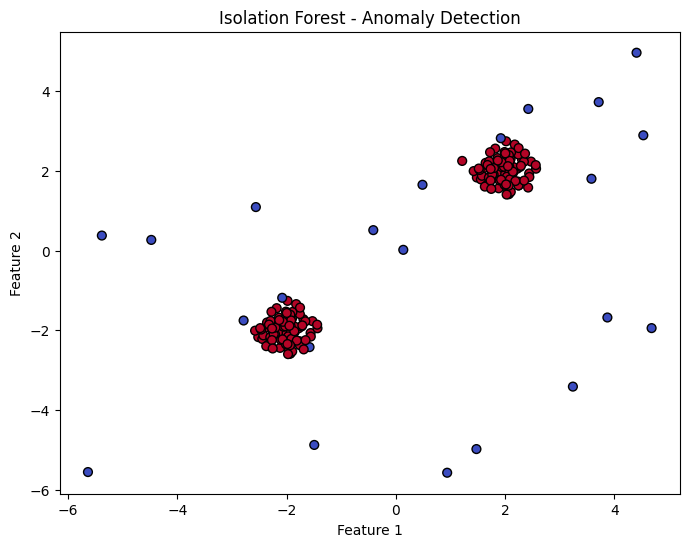

In [5]:
# Isolation Forest for Anomaly Detection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Create a sample 2D dataset (for visualization)
rng = np.random.RandomState(42)

# Normal data
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]

# Outliers
X_outliers = rng.uniform(low=-6, high=6, size=(20, 2))

# Combine normal points and outliers
X = np.r_[X_normal, X_outliers]

# 2. Apply Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Predictions: 1 = normal, -1 = anomaly
labels = model.predict(X)

# 3. Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1],
            c=labels, cmap="coolwarm", s=40, edgecolor="k")
plt.title("Isolation Forest - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.
(Include your Python code and output in the code box below.)

12-Month Forecast with 95% Confidence Interval:

            Forecast  Lower_CI  Upper_CI
1961-01-01    444.22    421.45    467.00
1961-02-01    420.12    393.47    446.78
1961-03-01    451.84    421.82    481.87
1961-04-01    488.81    456.98    520.64
1961-05-01    501.30    468.14    534.45
1961-06-01    563.61    529.60    597.63
1961-07-01    649.40    614.77    684.04
1961-08-01    636.42    601.36    671.48
1961-09-01    538.75    503.38    574.11
1961-10-01    491.02    455.43    526.61
1961-11-01    422.80    387.05    458.55
1961-12-01    464.81    428.94    500.68


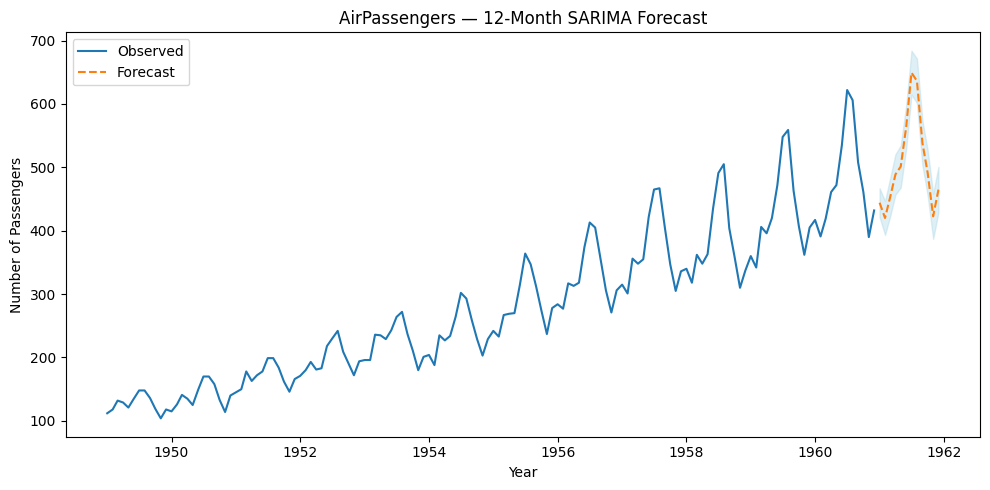

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
series = data['Passengers'].asfreq('MS')

model = SARIMAX(series,
                order=(2,1,2),
                seasonal_order=(0,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

forecast_steps = 12
forecast_res = results.get_forecast(steps=forecast_steps)
forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

forecast_index = pd.date_range(start=series.index[-1] + pd.offsets.MonthBegin(1),
                               periods=forecast_steps, freq='MS')

forecast_df = pd.DataFrame({
    'Forecast': forecast.values,
    'Lower_CI': conf_int.iloc[:, 0].values,
    'Upper_CI': conf_int.iloc[:, 1].values
}, index=forecast_index)

print("12-Month Forecast with 95% Confidence Interval:\n")
print(forecast_df.round(2))

plt.figure(figsize=(10, 5))
plt.plot(series, label="Observed")
plt.plot(forecast_df['Forecast'], label="Forecast", linestyle="--")
plt.fill_between(forecast_df.index,
                 forecast_df['Lower_CI'],
                 forecast_df['Upper_CI'],
                 color="lightblue", alpha=0.4)
plt.title("AirPassengers — 12-Month SARIMA Forecast")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.tight_layout()
plt.show()



Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

(Include your Python code and output in the code box below.)

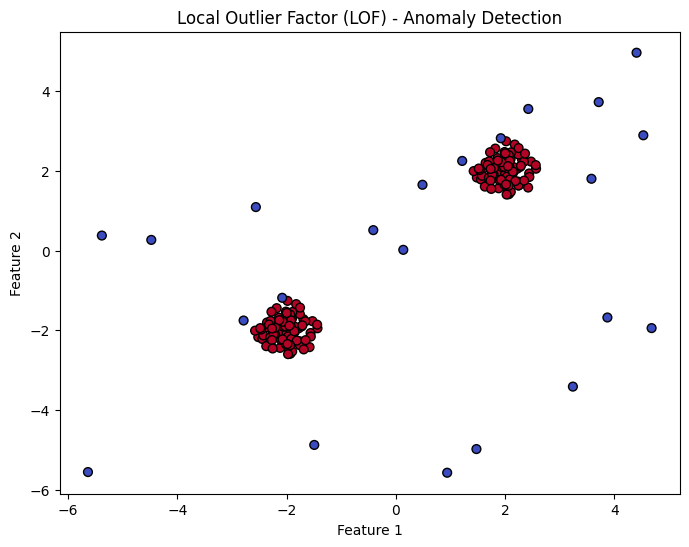

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]
X_outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.r_[X_normal, X_outliers]

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
labels = lof.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="coolwarm", s=40, edgecolor="k")
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
* How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
* Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
* How would you validate and monitor the performance over time?
* How would this solution help business decisions or operations?

(Include your Python code and output in the code box below.)

Answer-
* Real-Time Data Science Workflow (Power Grid Monitoring)
  1. Anomaly Detection:
     * Use rules (Z-score / EWMA) for fast detection.
     * Apply Isolation Forest for robust anomaly detection on streaming data.
     * LOF (local density) and DBSCAN (batch) are less suited for real-time but useful offline.
  2. Forecasting:
     * Use SARIMAX for short-term forecasts (handles seasonality + weather/holiday effects).
     * Alternative: Prophet or lightweight LSTMs for nonlinear patterns.
  3. Validation & Monitoring:
     * Backtest with rolling forecasts. Metrics: MAE, RMSE, MAPE.
     * Monitor drift, model error, and anomaly precision/recall.
     * Set thresholds/alerts and retrain models when needed.
  4. Business Value:
     * Detect spikes/drops early → prevent outages and optimize grid stability.
     * Improve demand forecasts → reduce reserve costs.
     * Support decisions on load balancing, maintenance, and dispatching crews.

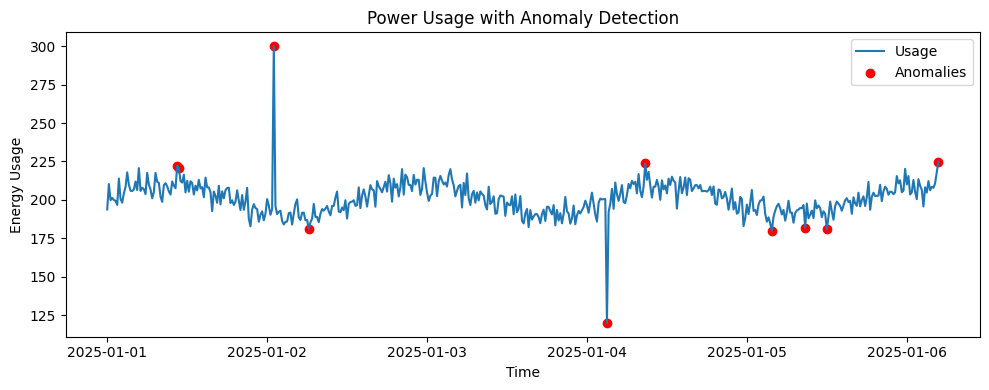

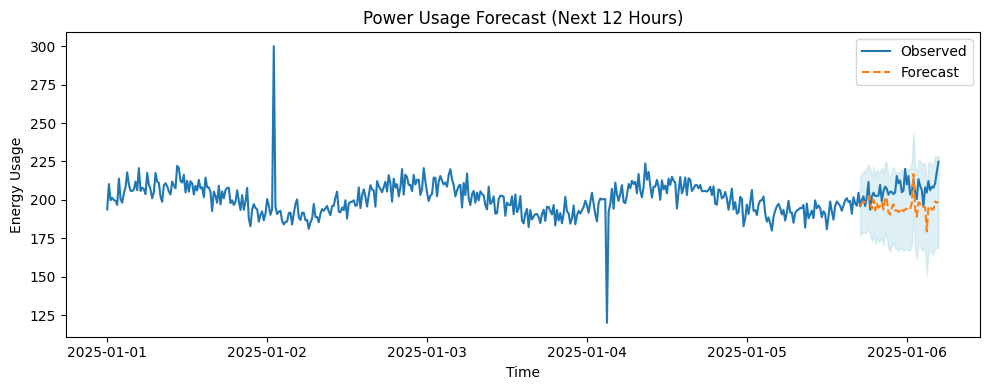

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

rng = pd.date_range("2025-01-01", periods=500, freq="15min")
usage = 200 + 10*np.sin(np.arange(500)/24) + np.random.normal(0, 5, 500)
usage[100], usage[300] = 300, 120
data = pd.DataFrame({"timestamp": rng, "usage": usage}).set_index("timestamp")

iso = IsolationForest(contamination=0.02, random_state=42)
data["anomaly"] = iso.fit_predict(data[["usage"]])

plt.figure(figsize=(10,4))
plt.plot(data.index, data["usage"], label="Usage")
plt.scatter(data.index[data["anomaly"]==-1],
            data["usage"][data["anomaly"]==-1],
            color="red", label="Anomalies")
plt.title("Power Usage with Anomaly Detection")
plt.xlabel("Time"); plt.ylabel("Energy Usage")
plt.legend(); plt.tight_layout()
plt.show()

train = data["usage"][:-48]
model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,96))
results = model.fit(disp=False)

forecast = results.get_forecast(steps=48)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(10,4))
plt.plot(data.index, data["usage"], label="Observed")
plt.plot(pred.index, pred, label="Forecast", linestyle="--")
plt.fill_between(pred.index, conf_int.iloc[:,0], conf_int.iloc[:,1],
                 color="lightblue", alpha=0.4)
plt.title("Power Usage Forecast (Next 12 Hours)")
plt.xlabel("Time"); plt.ylabel("Energy Usage")
plt.legend(); plt.tight_layout()
plt.show()
